'''

Author: Prathamesh Deshpande<br>
Date: 15-11-24<br>
Last modified by: Prathamesh Deshpande<br>
Last modified time:<br>
Title: KNN model to predict  predict whether a person makes over 50K a year or not br>

'''

Import Libraries

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

Import Dataset

In [2]:
df = pd.read_csv("classification_2.csv", header=None,na_values=' ?',
                 names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                        'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                        'hours-per-week', 'native-country', 'income'])

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Analyzing the dataset

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Identifying and Handling Missing Values

In [6]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [7]:
missing_columns = ['workclass','occupation','native-country']
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df[missing_columns])
df[missing_columns] = imputer.transform(df[missing_columns])

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Check for outliers

In [9]:
# Select only numerical columns
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()

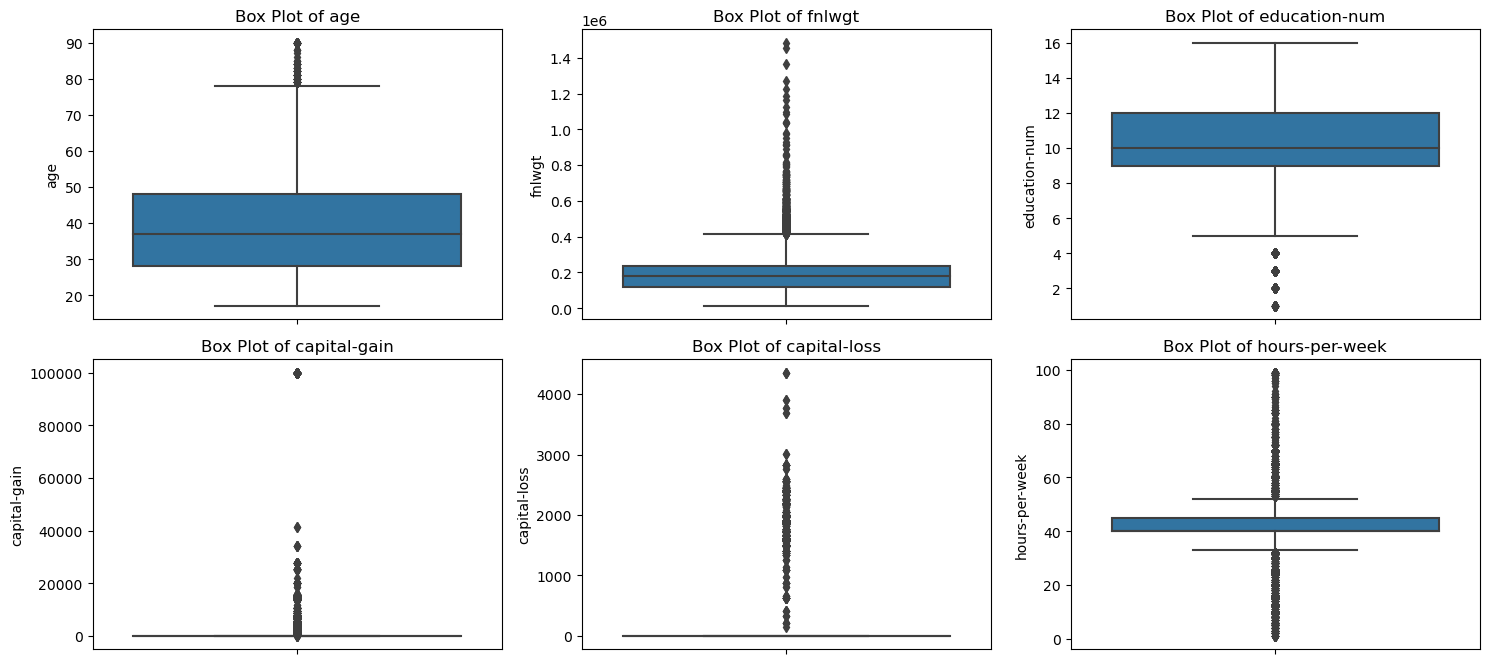

In [10]:
# Visualizing the initial data with box plots to check for outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [11]:
# Calculate IQR for numerical columns
Q1 = df[num_columns].quantile(0.25)  # 25th percentile
Q3 = df[num_columns].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Filtering the data to remove outliers
df_filtered = df[~((df[num_columns] < (Q1 - 1.5 * IQR)) | (df[num_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the shape of the original and filtered data
print(f'Original data shape: {df.shape}')
print(f'Filtered data shape: {df_filtered.shape}')

Original data shape: (32561, 15)
Filtered data shape: (18997, 15)


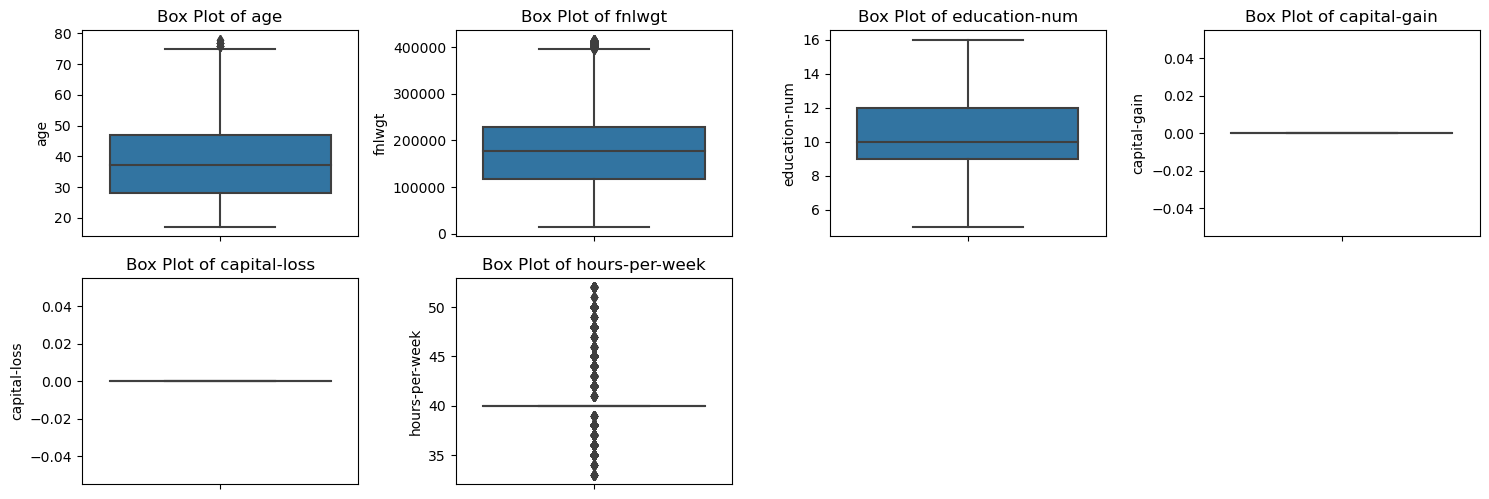

In [12]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Plotting box plots for each numerical column
for i, column in enumerate(num_columns):
    plt.subplot(4, 4, i + 1)  # Adjust subplot dimensions as needed
    sns.boxplot(y=df_filtered[column])  # Using df_filtered to show post-filtering data
    plt.title(f'Box Plot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()


Handling the categorical values

In [13]:
df_filtered.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [14]:
df_filtered['workclass'].value_counts()

 Private             14580
 Local-gov            1333
 Self-emp-not-inc     1105
 State-gov             830
 Federal-gov           665
 Self-emp-inc          480
 Never-worked            2
 Without-pay             2
Name: workclass, dtype: int64

In [15]:
df_filtered['education'].value_counts()

 HS-grad         6946
 Some-college    4252
 Bachelors       3211
 Masters          940
 Assoc-voc        915
 Assoc-acdm       653
 11th             580
 10th             532
 9th              344
 12th             242
 Prof-school      211
 Doctorate        171
Name: education, dtype: int64

In [16]:
df_filtered['marital-status'].value_counts()

 Married-civ-spouse       8593
 Never-married            6087
 Divorced                 2965
 Separated                 656
 Widowed                   447
 Married-spouse-absent     237
 Married-AF-spouse          12
Name: marital-status, dtype: int64

In [17]:
df_filtered['occupation'].value_counts()

 Prof-specialty       3098
 Craft-repair         2818
 Adm-clerical         2579
 Exec-managerial      2376
 Sales                1898
 Other-service        1617
 Machine-op-inspct    1402
 Transport-moving      915
 Handlers-cleaners     823
 Tech-support          601
 Protective-serv       410
 Farming-fishing       409
 Priv-house-serv        45
 Armed-Forces            6
Name: occupation, dtype: int64

In [18]:
df_filtered['relationship'].value_counts()

 Husband           7633
 Not-in-family     5148
 Own-child         2572
 Unmarried         2256
 Wife               841
 Other-relative     547
Name: relationship, dtype: int64

In [19]:
df_filtered['race'].value_counts()

 White                 16064
 Black                  1966
 Asian-Pac-Islander      618
 Amer-Indian-Eskimo      198
 Other                   151
Name: race, dtype: int64

In [20]:
df_filtered['sex'].value_counts()

 Male      12712
 Female     6285
Name: sex, dtype: int64

In [21]:
country_counts = df_filtered['native-country'].value_counts()
country_counts
 

 United-States                 17544
 Mexico                          230
 Philippines                     128
 Germany                          87
 Canada                           66
 Puerto-Rico                      65
 Jamaica                          59
 India                            58
 Cuba                             56
 England                          51
 China                            45
 El-Salvador                      41
 Poland                           41
 Vietnam                          40
 Dominican-Republic               38
 South                            38
 Italy                            37
 Columbia                         37
 Japan                            32
 Taiwan                           27
 Iran                             25
 Guatemala                        24
 Haiti                            23
 Portugal                         22
 France                           18
 Ireland                          16
 Hong                             15
 

In [22]:
ordinal_features = ['education','marital-status']
encoder = OrdinalEncoder()
df_encoded = df_filtered.copy()
df_encoded[ordinal_features] = encoder.fit_transform(df_encoded[ordinal_features])

In [23]:
df_encoded.shape

(18997, 15)

In [24]:
df_encoded.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38,Private,215646,8.0,9,0.0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,1.0,7,2.0,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,6.0,13,2.0,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,9.0,14,2.0,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,8.0,9,2.0,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [25]:
 # Identify countries with less than 100 occurrences
countries_to_replace = country_counts[country_counts < 50].index

# Replace those countries with 'Other'
df_encoded['native-country'] = df_encoded['native-country'].replace(countries_to_replace, 'Other')


In [26]:
df_encoded['native-country'].value_counts()

 United-States    17544
Other               653
 Mexico             230
 Philippines        128
 Germany             87
 Canada              66
 Puerto-Rico         65
 Jamaica             59
 India               58
 Cuba                56
 England             51
Name: native-country, dtype: int64

In [27]:
df_encoded.shape

(18997, 15)

In [28]:
# Define nominal features for one-hot encoding
nominal_features = ['workclass', 'occupation','relationship', 'race', 'sex', 'native-country']

# Ensure nominal features exist in the DataFrame
df_nominal = df_encoded[nominal_features]
print(df_nominal)

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform nominal features
encoded_data = encoder.fit_transform(df_nominal)

print(encoded_data)

# Create a DataFrame for the encoded features with appropriate column names
one_hot_encoded_df = pd.DataFrame(
    encoded_data, 
    columns=encoder.get_feature_names_out(nominal_features),
    index=df_encoded.index
)

# Drop nominal features and concatenate the new one-hot encoded columns
df_encoded = pd.concat([df_encoded.drop(columns=nominal_features), one_hot_encoded_df], axis=1)

# Display the updated DataFrame
print(df_encoded)

               workclass          occupation    relationship    race      sex  \
2                Private   Handlers-cleaners   Not-in-family   White     Male   
3                Private   Handlers-cleaners         Husband   Black     Male   
4                Private      Prof-specialty            Wife   Black   Female   
5                Private     Exec-managerial            Wife   White   Female   
7       Self-emp-not-inc     Exec-managerial         Husband   White     Male   
...                  ...                 ...             ...     ...      ...   
32554            Private     Exec-managerial         Husband   White     Male   
32555            Private     Protective-serv   Not-in-family   White     Male   
32556            Private        Tech-support            Wife   White   Female   
32557            Private   Machine-op-inspct         Husband   White     Male   
32558            Private        Adm-clerical       Unmarried   White   Female   

       native-country  
2  

Split Data into Dependent and Independent Variable

In [29]:
# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['income'])  # All columns except 'income'
y = df_encoded['income']  # Target variable: 'income'

Corelation Matrix

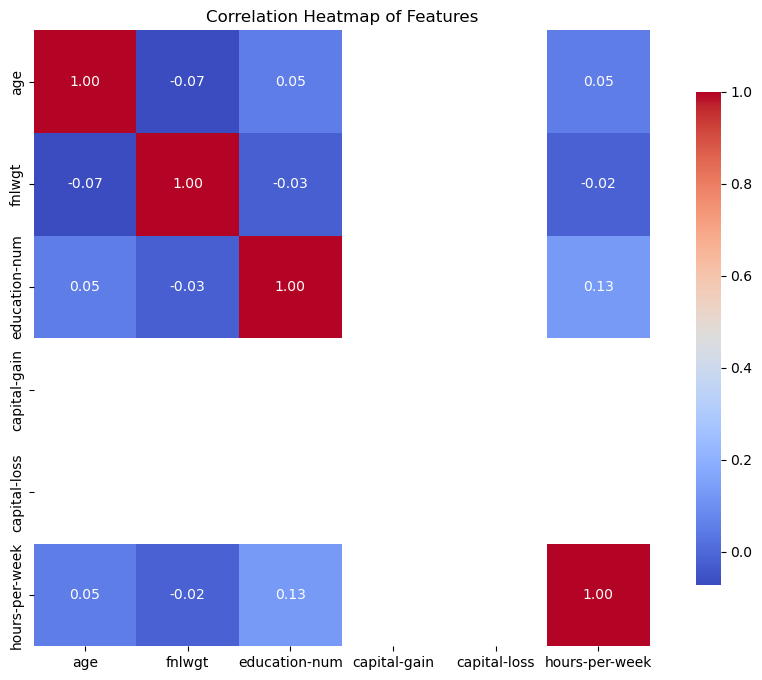

In [30]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_filtered.drop(columns=['education','marital-status','workclass', 'occupation','relationship', 'race', 'sex', 'native-country','income']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features')
plt.show()

In [31]:
X = X.drop(columns=['capital-gain','capital-loss'])
X

,age,fnlwgt,education,education-num,marital-status,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Cuba,native-country_ England,native-country_ Germany,native-country_ India,native-country_ Jamaica,native-country_ Mexico,native-country_ Philippines,native-country_ Puerto-Rico,native-country_ United-States,native-country_Other
2,38,215646,8.0,9,0.0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,53,234721,1.0,7,2.0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28,338409,6.0,13,2.0,40,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,37,284582,9.0,14,2.0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,52,209642,8.0,9,2.0,45,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,321865,9.0,14,2.0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32555,22,310152,11.0,10,4.0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32556,27,257302,4.0,12,2.0,38,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32557,40,154374,8.0,9,2.0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Splitting the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Hyper-Parameter Tuning(Finding the optimal value of k)

In [34]:
# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameter range
param_grid = {'n_neighbors': np.arange(2, 40, 1)}

# Initialize the K-Nearest Neighbors model
knn = KNeighborsClassifier()

# Set up GridSearchCV with cross-validation
knn_cv = GridSearchCV(estimator=knn, param_grid=param_grid, cv=kf, verbose=1, scoring='accuracy')

# Fit GridSearchCV on the training data
knn_cv.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 38 candidates, totalling 190 fits


c:\Users\Prathamesh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Prathamesh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])},
             scoring='accuracy', verbose=1)

In [35]:
# Print the best hyperparameters and best score
print("Best number of neighbors:", knn_cv.best_params_['n_neighbors'])
print("Best cross-validated accuracy:", knn_cv.best_score_)

Best number of neighbors: 29
Best cross-validated accuracy: 0.8291113550163661


Model Training

In [36]:
knn=KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=29)

In [37]:
y_pred=knn.predict(X_test_scaled)

c:\Users\Prathamesh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model Evaluation

Accuracy: 0.8373684210526315
Confusion Matrix:
 [[2812  225]
 [ 393  370]]
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3037
        >50K       0.62      0.48      0.54       763

    accuracy                           0.84      3800
   macro avg       0.75      0.71      0.72      3800
weighted avg       0.83      0.84      0.83      3800



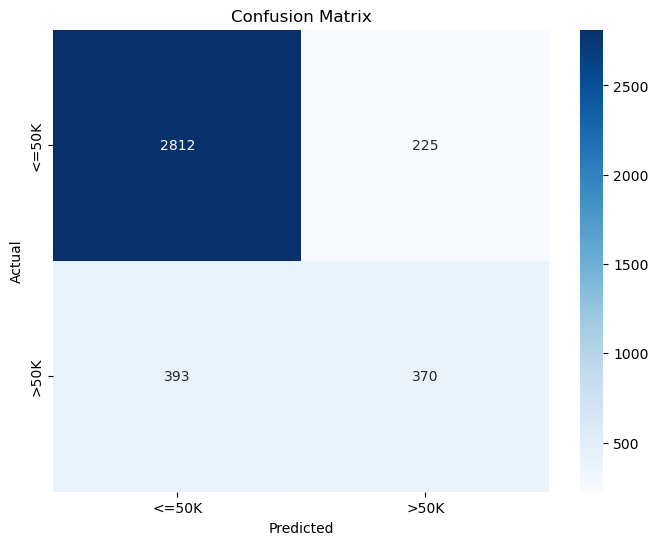

In [38]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()